# Survival Prediction of Titanic Ship

In [1]:
# We'll be looking at predicting which passengers survived the sinking of the Titanic.
# The idea is like if we were on board on April 15, 1912, with out seat location, would we survive or die!

In [2]:
# Let is first import the data - we have train.csv which will be used to train our model and test.csv to test the prediction

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [58]:
# Checking the data
print(test.shape)
print(train.shape)

# It seems there is one column missing in test - but that is probably the Survival column which our model has to predicty.

(418, 11)
(891, 12)


In [59]:
# Cool so let us begin exploring the data we have

# Below is the details obtained about the fields from Kaggle Titanic Prediction Competition

# survival	Survival	0 = No, 1 = Yes
# pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
# sex	Sex	
# Age	Age in years	
# sibsp	# of siblings / spouses aboard the Titanic	
# parch	# of parents / children aboard the Titanic	
# ticket	Ticket number	
# fare	Passenger fare	
# cabin	Cabin number	
# embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


        Survived
Sex             
female  0.742038
male    0.188908


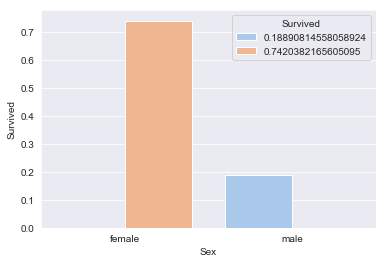

In [60]:
# The prediction we are doing is the classification type. Meaning, we are classifying whether an individual survived or not
# Looking at the data, many factors does help our model to predict more accurately like Age, Sex, Passanger Class(Pclass) etc

sex_pivot = train.pivot_table(index='Sex', values='Survived')
print(sex_pivot)

# Clearly female gender has survival percent more. 
sns.set_style('darkgrid')
sns.barplot(x = sex_pivot.index, y = 'Survived', hue = 'Survived', palette = 'pastel', data = sex_pivot)

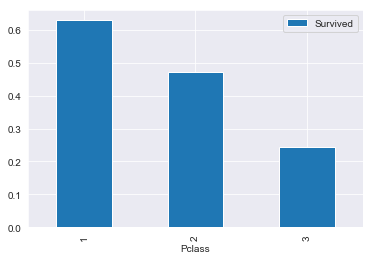

In [61]:
# Let us apply the same methodology on Passenger Class(Pclass) and Suvived field
pclass_pivot = train.pivot_table(index='Pclass', values='Survived')
#pclass_pivot

pclass_pivot.plot.bar()
plt.show()

In [62]:
# Exploring the data which acts as feature to our prediction - Age and Passenger Class
# Let us explore more about how the Age field has the data

train.Age.describe()

# Min Age value is 0.42 and Max Age value is 80. In Kaggle page, it has been briefed that the age below 1 is fractional.
# If you note, there are 891 records in train.csv and among them we have age value for 714 of them
# Meaning there are records of type NaN(Not a Number).

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

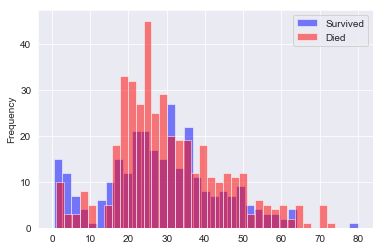

In [63]:
# All of this means that the Age column needs to be treated slightly differently, as this is a continuous numerical column. 
# One way to look at distribution of values in a continuous numerical set is to use histograms. 
# We can create two histograms to compare visually the those that survived vs those who died across different age ranges:

# train[train["Survived"] == 1]

survived = train[train['Survived'] == 1]
died = train[train['Survived'] == 0]
survived['Age'].plot.hist(alpha = .5, color = 'blue', bins = 35) #alpha-brightness of bin, color-color, bins-size of bar
died['Age'].plot.hist(alpha = .5, color = 'red', bins = 35)
plt.legend(['Survived', 'Died'])
plt.show()

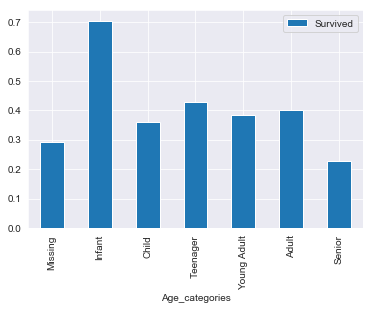

In [64]:
# There are some age ranges where more passengers Survived - (blue bars higher than red bars)
# If this data has to be useful for our ML Model, we need to change this contineous data to categorical feature by dividing
# into ranges by using pandas.cut() function
# Note: Any cahnges made to train data set must be made to test data set as well, because...duh... obvious reason!

def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

age_cat_pivot = train.pivot_table(index="Age_categories",values="Survived")
age_cat_pivot.plot.bar()
plt.show()

In [65]:
# SO far we have three fields which is ncessary for our model to make predictions
# 1. Sex
# 2. Passenger Class
# 3. Age - We now call it Age_Categories

#Let us take a look at Passenger Class
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [66]:
# Our ML Model might not know the idea that having Pclass as 1, 2 and 3 does not mean twice of 1 is equals to 2. That is not
# how the relationship between the passenegr class is. It is the luxury type of accomodation the passenger has chosen.
# Being pclass as 3 does not mean he has higher percentage of survival as 3 > 1
# So we need to split all to different classes and all must have the same values

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0,0,1


In [67]:
train = create_dummies(train,"Sex")
test = create_dummies(test,"Sex")
train = create_dummies(train,"Age_categories")
test = create_dummies(test,"Age_categories")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0


In [68]:
# Creating our first machine learning model

# Our data has been prepared and 
# will be using Logistic Regression (which is often the first model you will train when performing classification.)
# We will be using scikit-learn library

# The scikit-learn workflow consists of five main steps:

# 1. Instantiate (or create) the specific machine learning model you want to use
# 2. Fit the model to the training data
# 3. Use the model to make predictions
# 4. Evaluate the accuracy of the predictions
# 5. Each model in scikit-learn is implemented as a separate class and the first step is to identify the class we want to create an instance of. 
#    In our case, we want to use the LogisticRegression class.


holdout = test # from now on we will refer to this dataframe as the holdout data

# First, we need to import the class
from sklearn.model_selection import train_test_split

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.2,random_state=0)

train_X.shape

(712, 12)

In [69]:
# Making Predictions and Measuring their Accuracy

# First, we need to import the class
from sklearn.metrics import accuracy_score

# we create a LogisticRegression object:
lr = LogisticRegression()

lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
accuracy

0.8100558659217877

In [70]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_y, predictions)
pd.DataFrame(conf_matrix, columns=['Survived', 'Died'], index=[['Survived', 'Died']])

,Survived,Died
Survived,96,14
Died,20,49


In [72]:
# Using Cross Validation for More Accurate Error Measurement

# Our model has an accuracy score of 81.0% when tested against our 20% test set. 
# Given that this data set is quite small, there is a good chance that our model is overfitting, 
# and will not perform as well on totally unseen data.

# To give us a better understanding of the real performance of our model, 
# we can use a technique called cross validation to train 
# and test our model on different splits of our data, and then average the accuracy scores.

from sklearn.model_selection import cross_val_score
import numpy as np

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
np.mean(scores)

0.8024670865963002

In [74]:
# Making Predictions on Unseen Data

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

lr = LogisticRegression()
lr.fit(all_X, all_y)
holdout_predictions = lr.predict(holdout[columns])
holdout_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [75]:
# Creating a Submission File

holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

# Final Ultimatum
submission.to_csv('titanic_submission.csv', index=False)

In [100]:
# Making Predictions by using KNN

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(train_X, train_y)

y_pred = classifier.predict(test_X)

result2 = accuracy_score(test_y,y_pred)
print("Accuracy:",result2)

holdout_predictions = classifier.predict(holdout[columns])

#Create a CSV with results
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

# Final Ultimatum
submission.to_csv('titanic_submission3.csv', index=False)

Accuracy: 0.8156424581005587


In [104]:
# Making Predictions by using Decision Classifier

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)


y_pred = decision_tree.predict(test_X)

result2 = accuracy_score(test_y,y_pred)
print("Accuracy:",result2)

holdout_predictions = decision_tree.predict(holdout[columns])

#Create a CSV with results
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

# Final Ultimatum
submission.to_csv('titanic_submission2.csv', index=False)

Accuracy: 0.8156424581005587


In [115]:
# Making Predictions by using Random Forest

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_X, train_y)

y_pred = random_forest.predict(test_X)

score = accuracy_score(test_y,y_pred)
print("Accuracy:", score)

holdout_predictions = random_forest.predict(holdout[columns])

#Create a CSV with results
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

# Final Ultimatum
submission.to_csv('titanic_submission4.csv', index=False)

Accuracy: 0.8100558659217877
